# Product Revenue Prediction with Linear Regression

## Imports Libraries
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import and check the data

* yitemrevenue – Item Revenue at Rs
* xcartadd – Numbers of instance added to cart
* xcartuniqadd – Numbers of unique instance added to cart
* xcartaddtotalrs –Total Rs value of products after they are added to cart
* xcartremove- Numbers of instances removed from cart
* xcardtremovetotal – Total numbers of instances removed from cart
* xcardtremovetotalrs – Total  Rs after numbers of instances removed from cart
* xproductviews – Numbers of page views
* xuniqprodview – Numbers of uniqe product views
* xprodviewinrs – Rs at total numbers of page views

In [31]:
df = pd.read_csv('product_revenue.csv')
df.head()

,yitemrevenue,xcartadd,xcartuniqadd,xcartaddtotalrs,xcartremove,xcardtremovetotal,xcardtremovetotalrs,xproductviews,xuniqprodview,xprodviewinrs
0,39215.93,614,503,752186,10,10,11990,24306,20498,299
1,23819.47,833,622,425667,8,5,3992,11171,8718,571
2,4415.45,122,101,121878,2,2,1998,6926,6017,6919074
3,57435.56,239,196,609761,2,2,4998,11250,9733,2834
4,0.00,32,22,58488,0,0,0,872,764,1745628


In [32]:
df.describe()

,yitemrevenue,xcartadd,xcartuniqadd,xcartaddtotalrs,xcartremove,xcardtremovetotal,xcardtremovetotalrs,xproductviews,xuniqprodview,xprodviewinrs
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,9.200000e+01
mean,3679.082174,39.500000,30.347826,48131.826087,1.423913,0.880435,1962.402174,1331.576087,1084.891304,1.380471e+06
std,8120.313959,108.548819,84.138352,107360.991406,2.219958,1.546655,3526.679144,2951.472183,2483.228479,1.026994e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,225.000000,2.990000e+02
25%,0.000000,7.750000,6.000000,11947.500000,0.000000,0.000000,0.000000,601.000000,472.250000,6.868305e+05
50%,1166.320000,15.000000,12.000000,22673.000000,0.000000,0.000000,0.000000,766.000000,614.500000,1.224656e+06
75%,3639.675000,29.000000,22.250000,46529.500000,2.000000,1.250000,2153.500000,905.000000,746.750000,1.746880e+06
max,57435.560000,833.000000,622.000000,752186.000000,10.000000,10.000000,15960.000000,24306.000000,20498.000000,6.919074e+06


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 10 columns):
yitemrevenue           92 non-null float64
xcartadd               92 non-null int64
xcartuniqadd           92 non-null int64
xcartaddtotalrs        92 non-null int64
xcartremove            92 non-null int64
xcardtremovetotal      92 non-null int64
xcardtremovetotalrs    92 non-null int64
xproductviews          92 non-null int64
xuniqprodview          92 non-null int64
xprodviewinrs          92 non-null int64
dtypes: float64(1), int64(9)
memory usage: 7.3 KB


In [34]:
df.columns

Index(['yitemrevenue', 'xcartadd', 'xcartuniqadd', 'xcartaddtotalrs',
       'xcartremove', 'xcardtremovetotal', 'xcardtremovetotalrs',
       'xproductviews', 'xuniqprodview', 'xprodviewinrs'],
      dtype='object')

In [134]:
from scipy import stats
df_products = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [132]:
#keep only the ones that are within +3 to -3 standard deviations in the column 'yitemrevenue'.
df_products = df[np.abs(df.yitemrevenue-df.yitemrevenue.mean())<=(2*df.yitemrevenue.std())]

In [136]:
df_products = df[(df['xcartadd']<200) & 
                 (df['xcartuniqadd'] < 100) & 
                 (df['xcartremove'] < 5) & 
                 (df['xproductviews'] < 3000) & 
                 (df['yitemrevenue'] < 10000) ]

In [137]:
df_products.describe()

,yitemrevenue,xcartadd,xcartuniqadd,xcartaddtotalrs,xcartremove,xcardtremovetotal,xcardtremovetotalrs,xproductviews,xuniqprodview,xprodviewinrs
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,7.500000e+01
mean,1832.304000,18.693333,13.786667,27772.226667,0.800000,0.546667,1300.253333,729.293333,579.386667,1.300857e+06
std,2520.373677,17.362567,11.857593,24173.867400,1.345664,0.976665,2723.365933,248.755050,208.371283,7.291838e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,225.000000,7.303500e+04
25%,0.000000,7.500000,6.000000,10632.500000,0.000000,0.000000,0.000000,555.000000,435.500000,8.267125e+05
50%,574.590000,14.000000,11.000000,19789.000000,0.000000,0.000000,0.000000,731.000000,569.000000,1.224479e+06
75%,2779.535000,23.000000,17.000000,42584.500000,2.000000,1.000000,1287.500000,860.000000,694.000000,1.681614e+06
max,9545.370000,82.000000,56.000000,112772.000000,4.000000,4.000000,11967.000000,1587.000000,1331.000000,3.470649e+06


## Exploratory Data Analysis

**Let's explore the data!**

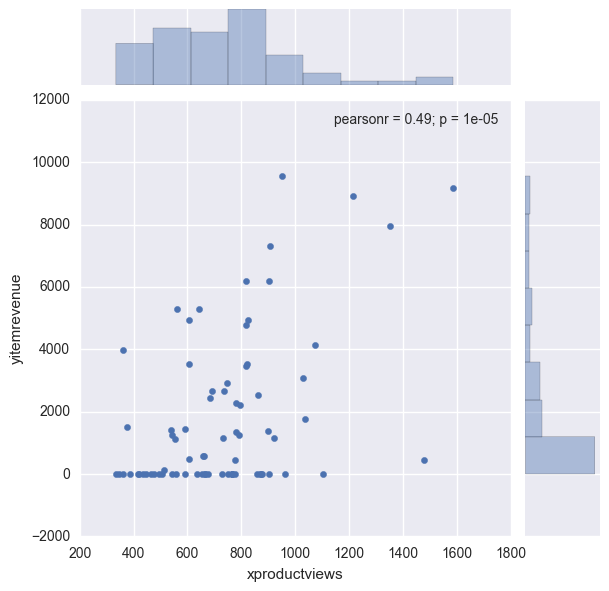

In [138]:
# More product views, more revenue.
sns.jointplot(x='xproductviews',y='yitemrevenue',data=df_products)

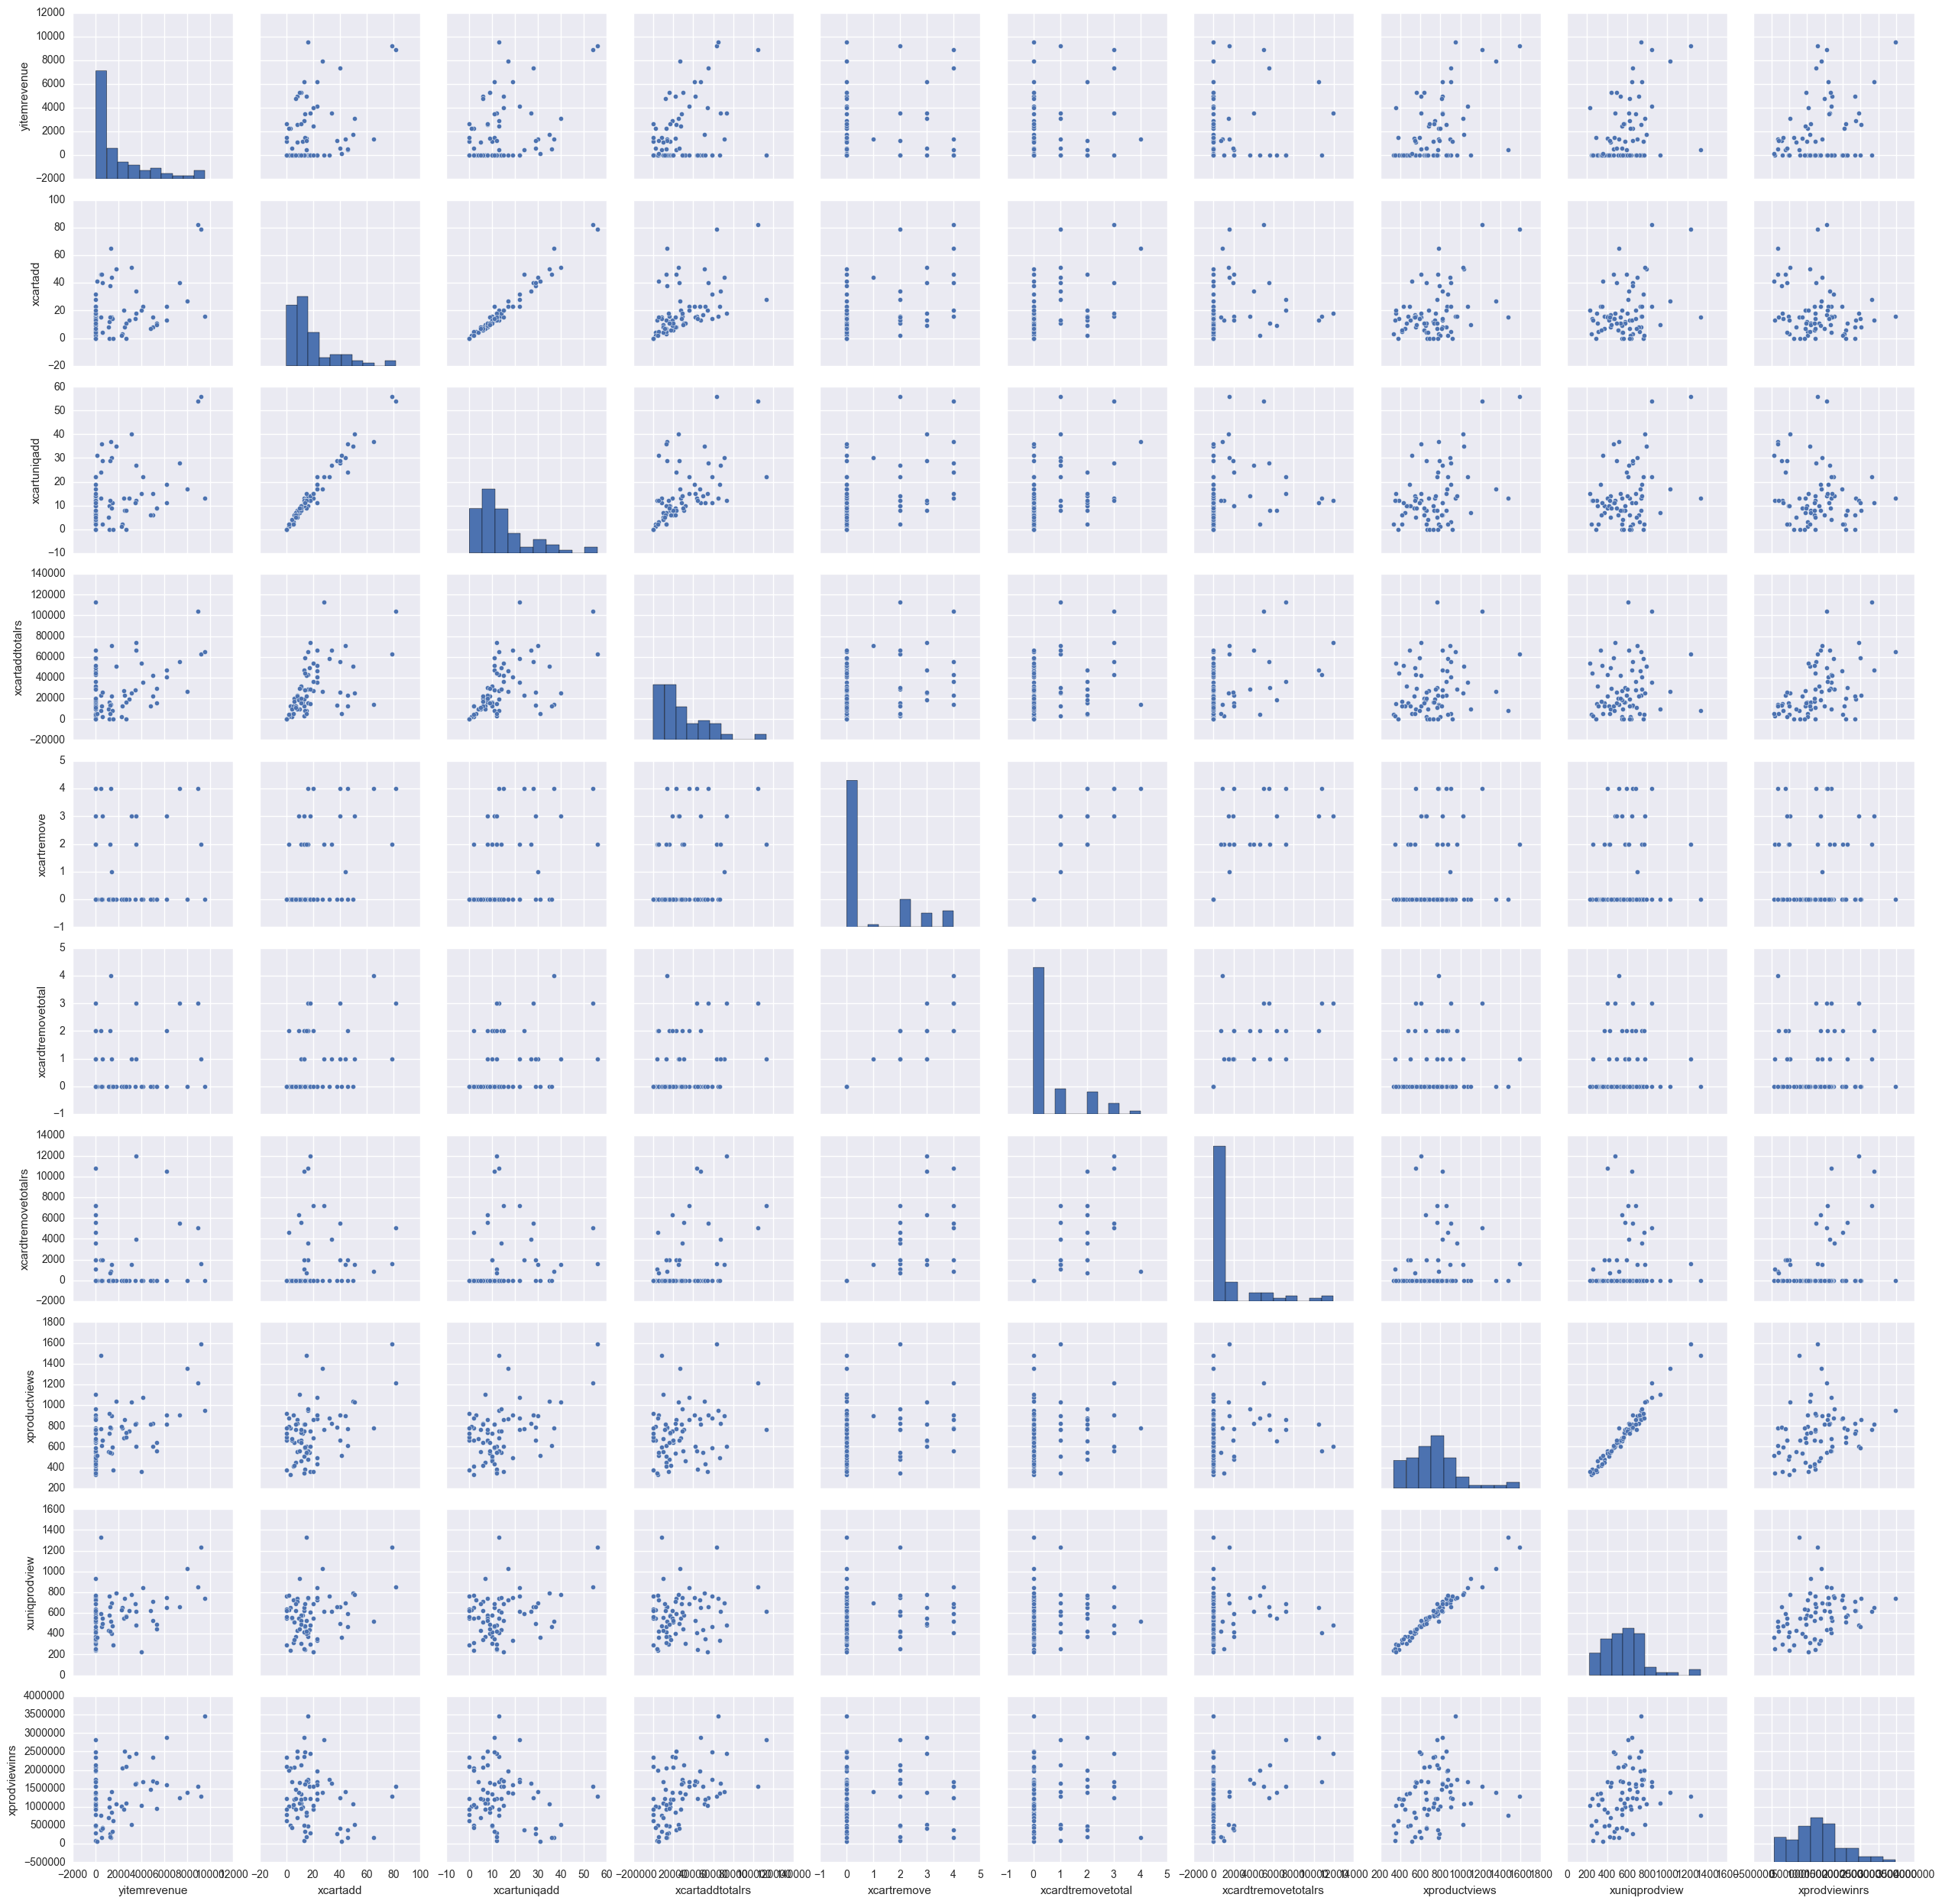

In [139]:
sns.pairplot(df_products)

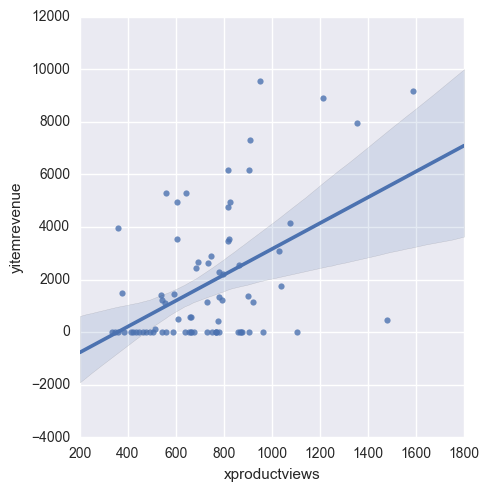

In [140]:
sns.lmplot(x='xproductviews',y='yitemrevenue',data=df_products)

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


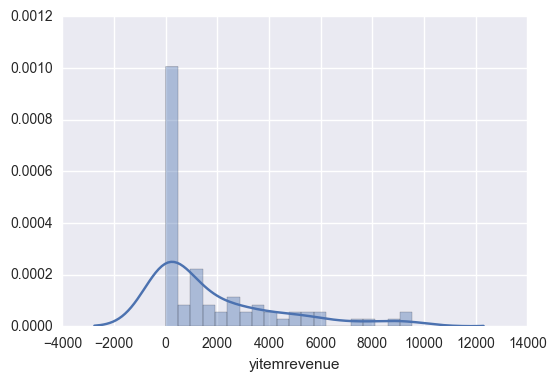

In [141]:
sns.distplot(df_products['yitemrevenue'], bins=20)

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.

** Set a variable X equal to the numerical features of the customers and a variable y equal to the "yitemrevenue" column. **

In [142]:
y = df_products['yitemrevenue']

In [143]:
X = df_products[['xcartadd', 'xcartuniqadd', 
                 'xcartaddtotalrs', 'xcartremove', 'xcardtremovetotal', 
                 'xcardtremovetotalrs','xproductviews', 'xuniqprodview', 'xprodviewinrs']]

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=42**

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [146]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [147]:
lm = LinearRegression()

In [148]:
# Train/fit lm on the training data.
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [149]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [  6.82829466e+01  -3.20020471e+00  -1.84401950e-02  -2.39501982e+02
   8.10559688e+02  -2.66224493e-01   1.47155118e+01  -1.51256720e+01
   1.81873362e-03]


In [150]:
lm.score(X_test, y_test)

0.065747181760012485

In [155]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
xcartadd,68.282947
xcartuniqadd,-3.200205
xcartaddtotalrs,-0.018440
xcartremove,-239.501982
xcardtremovetotal,810.559688
xcardtremovetotalrs,-0.266224
xproductviews,14.715512
xuniqprodview,-15.125672
xprodviewinrs,0.001819


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [151]:
predictions = lm.predict(X_test)

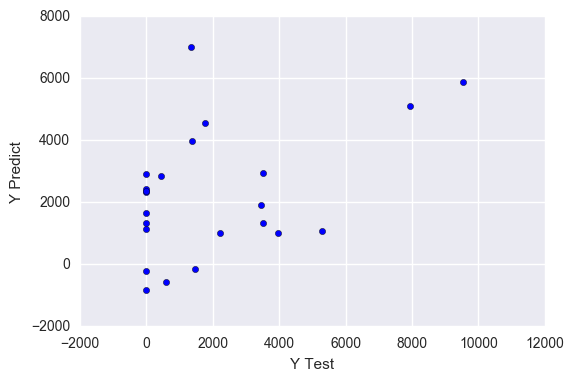

In [152]:
#Create a scatterplot of the real test values versus the predicted values.
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Y Predict')

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [153]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2202.46250175
MSE: 6318198.00426
RMSE: 2513.60259474


C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


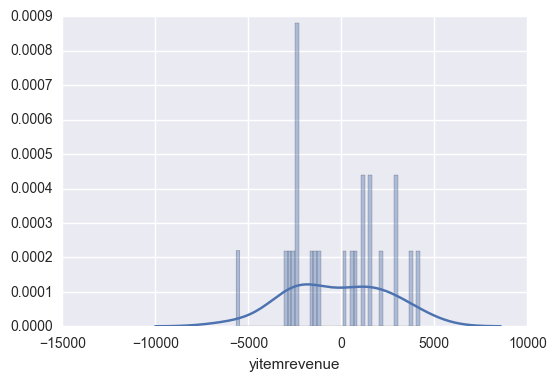

In [154]:
sns.distplot((y_test-predictions),bins=50);